# Results: Monthly Precipitation Depth

Compare simulated monthly precipitation depth distributions to the underlying data sets

Combine into one plot

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
SIM_ROOT1 = "DC_WGMN1"
SIM_ROOT2 = "DC_WGMN2"
SIM_ROOT3 = "DC_WGMN3"

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Load

### Data and LOCA

In [5]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_1981-2010.pickle" % SIM_ROOT3 ) )
DPDF = pd.read_pickle( OutFiler, compression='zip' )

In [6]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [7]:
DPDF["DLabel"].unique()

array(['PRISM 1981-2010', 'Simulated 1981-2010'], dtype=object)

In [8]:
DPDF = DPDF[DPDF["DLabel"] == 'PRISM 1981-2010']

### Simulation Results

In [9]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2011-2040.pickle" % SIM_ROOT1 ) )
S1P1DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2011-2040.pickle" % SIM_ROOT2 ) )
S2P1DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2011-2040.pickle" % SIM_ROOT3 ) )
S3P1DF = pd.read_pickle( InFiler, compression='zip' )

In [10]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2041-2070.pickle" % SIM_ROOT1 ) )
S1P2DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2041-2070.pickle" % SIM_ROOT2 ) )
S2P2DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2041-2070.pickle" % SIM_ROOT3 ) )
S3P2DF = pd.read_pickle( InFiler, compression='zip' )

In [11]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2071-2100.pickle" % SIM_ROOT1 ) )
S1P3DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2071-2100.pickle" % SIM_ROOT2 ) )
S2P3DF = pd.read_pickle( InFiler, compression='zip' )
InFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2071-2100.pickle" % SIM_ROOT3 ) )
S3P3DF = pd.read_pickle( InFiler, compression='zip' )

In [12]:
S1P1DF["DLabel"].unique()

array(['LOCA 2011-2040', 'Simulated 2011-2040'], dtype=object)

In [13]:
S1P2DF["DLabel"].unique()

array(['LOCA 2041-2070', 'Simulated 2041-2070'], dtype=object)

In [14]:
nS1P2DF = S1P2DF[S1P2DF["DLabel"] == 'Simulated 2041-2070'].copy()

In [15]:
S1P3DF["DLabel"].unique()

array(['LOCA 2071-2099', 'Simulated 2071-2100'], dtype=object)

In [16]:
nS1P3DF = S1P3DF[S1P3DF["DLabel"] == 'Simulated 2071-2100'].copy()

In [17]:
S1All1 = pd.concat( [ DPDF, S1P1DF, nS1P2DF, nS1P3DF ], ignore_index=True )

In [18]:
nS2P1DF = S2P1DF[S2P1DF["DLabel"] == "Simulated 2011-2040" ].copy()

In [19]:
nS2P3DF = S2P3DF[S2P3DF["DLabel"] == "Simulated 2071-2100" ].copy()

In [20]:
S2All1 = pd.concat( [ DPDF, nS2P1DF, S2P2DF, nS2P3DF ], ignore_index=True )

In [21]:
nS3P1DF = S3P1DF[S3P1DF["DLabel"] == 'Simulated 2011-2040'].copy()

In [22]:
nS3P2DF = S3P2DF[S3P2DF["DLabel"] == 'Simulated 2041-2070'].copy()

In [23]:
S3All1 = pd.concat( [ DPDF, nS3P1DF, nS3P2DF, S3P3DF ], ignore_index=True )

In [24]:
S1All1["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 2011-2040', 'Simulated 2011-2040',
       'Simulated 2041-2070', 'Simulated 2071-2100'], dtype=object)

In [25]:
S2All1["DLabel"].unique()

array(['PRISM 1981-2010', 'Simulated 2011-2040', 'LOCA 2041-2070',
       'Simulated 2041-2070', 'Simulated 2071-2100'], dtype=object)

In [26]:
S3All1["DLabel"].unique()

array(['PRISM 1981-2010', 'Simulated 2011-2040', 'Simulated 2041-2070',
       'LOCA 2071-2099', 'Simulated 2071-2100'], dtype=object)

In [27]:
PrismLabel1 = "PRISM 1981-2010"
LocaLabel1 = "LOCA 2011-2040"
LocaLabel2 = "LOCA 2041-2070"
LocaLabel3 = "LOCA 2071-2099"
SimLabel1 = "Simulated 2011-2040"
SimLabel2 = "Simulated 2041-2070"
SimLabel3 = "Simulated 2071-2100"

## Plots

In [28]:
preTicks = [ 1.0, 10.0, 100.0, 500.0, 1000.0 ]

In [29]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MonTotPreDep_All3_BW.svg" ) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_MonTotPreDep_All3_BW.svg'

In [30]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MonTotPreDep_All3_BW.png" ) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_MonTotPreDep_All3_BW.png'

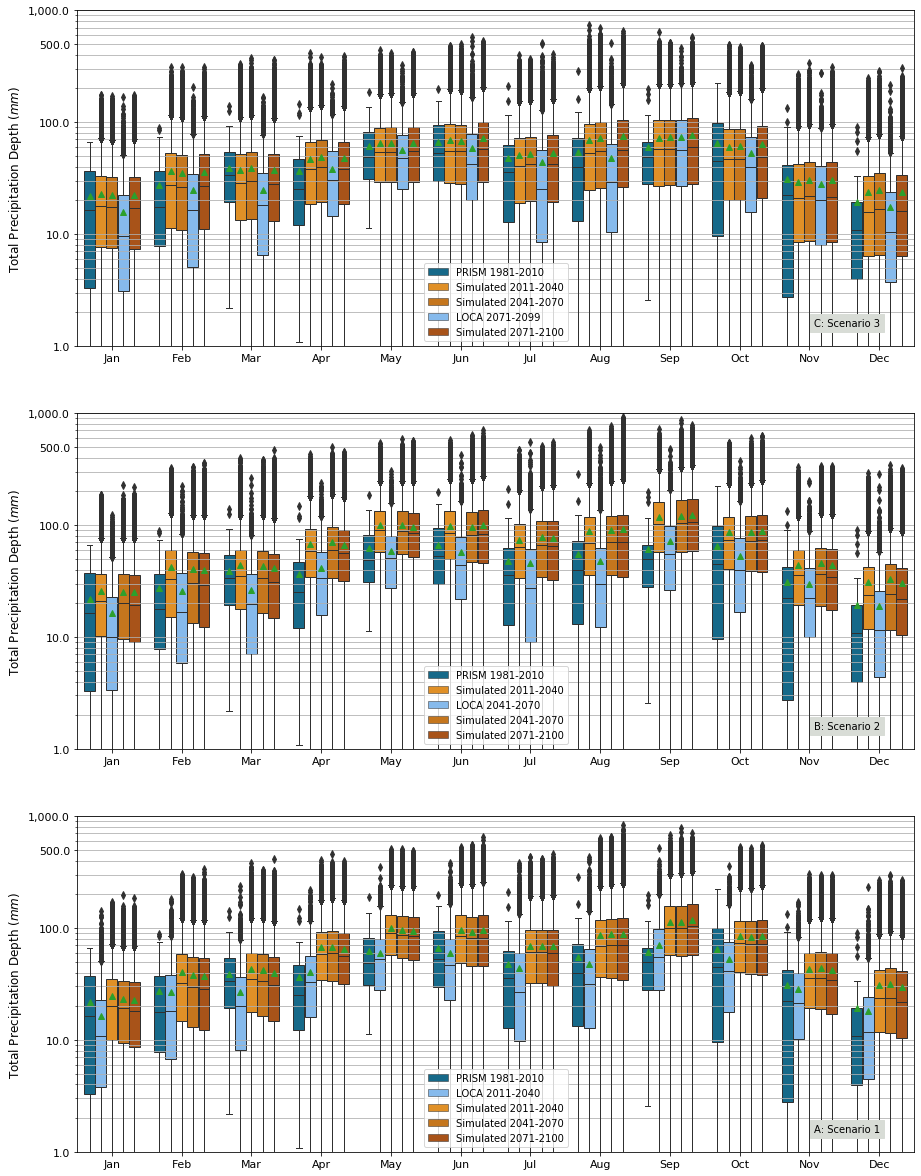

In [31]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(3,1,1)
g1 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.0, orient="v", showmeans=True,
                  palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel3 : "xkcd:sky blue",
                             SimLabel1 : "xkcd:tangerine",
                             SimLabel2 : "xkcd:pumpkin",
                             SimLabel3 : "xkcd:burnt orange" },
                  data=S3All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="lower center")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 1.0, 1000.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g1.annotate("C: Scenario 3", xy=(0.88,0.06), xycoords="axes fraction", fontsize=10.0,
              backgroundcolor="xkcd:light grey")
ax21 = Fig1.add_subplot(3,1,2)
g2 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel", showmeans=True,
                  dodge=True, linewidth=1.0, orient="v",
                  palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel2 : "xkcd:sky blue",
                             SimLabel1 : "xkcd:tangerine",
                             SimLabel2 : "xkcd:pumpkin",
                             SimLabel3 : "xkcd:burnt orange" },
                  data=S2All1, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="lower center")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g2.set_ylim( ( 1.0, 1000.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g2.annotate("B: Scenario 2", xy=(0.88,0.06), xycoords="axes fraction", fontsize=10.0,
              backgroundcolor="xkcd:light grey")
ax31 = Fig1.add_subplot(3,1,3)
g3 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.0, orient="v", showmeans=True,
                  palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel1 : "xkcd:sky blue",
                             SimLabel1 : "xkcd:tangerine",
                             SimLabel2 : "xkcd:pumpkin",
                             SimLabel3 : "xkcd:burnt orange" },
                  data=S1All1, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="lower center")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g3.set_ylim( ( 1.0, 1000.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g3.annotate("A: Scenario 1", xy=(0.88,0.06), xycoords="axes fraction", fontsize=10.0,
              backgroundcolor="xkcd:light grey")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )